 **Exploratory Data Analysis**

    Dataset url: https://archive.ics.uci.edu/ml/datasets/Statlog+(Shuttle)
    Classification problem



### Required library


In [0]:
import numpy as np
import pandas as pd

# plot
import matplotlib.pyplot as plt
import seaborn as sns


### Plot info

In [0]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 22})
fontdict = {'fontsize': 18,
           'weight' : 'bold'}
palette = palette=['green','orange','brown','blue', 'red', 'black', 'yellow']
sns.set()

### Read Data

In [0]:
df_train = pd.read_csv('./dataset/shuttle.trn', delimiter=' ', header=None)


In [0]:
# rename columns
columns = {}
names = [(x, 'Var ' + str(x)) for x in df_train.columns]
for old, new in names:
    columns[old] = new
    
df_train = df_train.rename(columns=columns)
df_train = df_train.rename(columns={'Var 9': 'target'})

In [0]:
df_train.describe()

,Var 0,Var 1,Var 2,Var 3,Var 4,Var 5,Var 6,Var 7,Var 8,target
count,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000,43500.000000
mean,48.249747,-0.205126,85.341563,0.262736,34.528782,1.298276,37.074552,50.899862,13.964598,1.700529
std,12.252618,78.142770,8.908602,41.004131,21.703409,179.486760,13.135557,21.463250,25.648404,1.354648
min,27.000000,-4821.000000,21.000000,-3939.000000,-188.000000,-13839.000000,-48.000000,-353.000000,-356.000000,1.000000
25%,38.000000,0.000000,79.000000,0.000000,26.000000,-5.000000,31.000000,37.000000,0.000000,1.000000
50%,45.000000,0.000000,83.000000,0.000000,42.000000,0.000000,39.000000,44.000000,2.000000,1.000000
75%,55.000000,0.000000,89.000000,0.000000,46.000000,5.000000,42.000000,60.000000,14.000000,1.000000
max,126.000000,5075.000000,149.000000,3830.000000,436.000000,13148.000000,105.000000,270.000000,266.000000,7.000000


### Distribution of classes

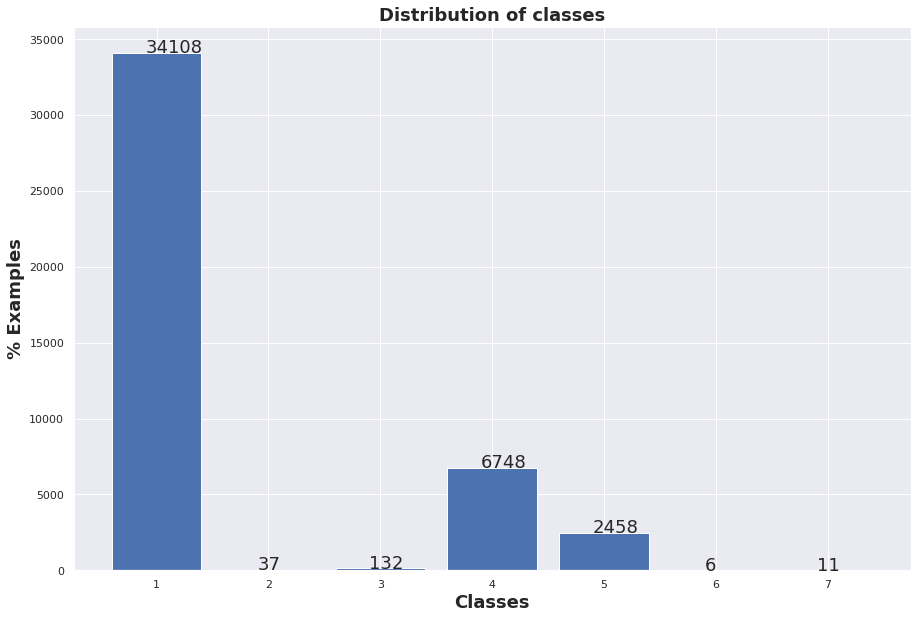

In [0]:
dist = df_train.iloc[:, -1].value_counts()
#plot
bar = plt.bar(dist.index, dist)
# info
plt.title("Distribution of classes", fontdict=fontdict)
plt.ylabel("% Examples", fontdict=fontdict)
plt.xlabel("Classes", fontdict=fontdict);
# plot values
for i in dist.index:
    plt.text(i - 0.1, dist[i], dist[i], 
              fontsize=18)


**This database is very unbalanced and this should be addressed in the preprocessing**

### Histogram 

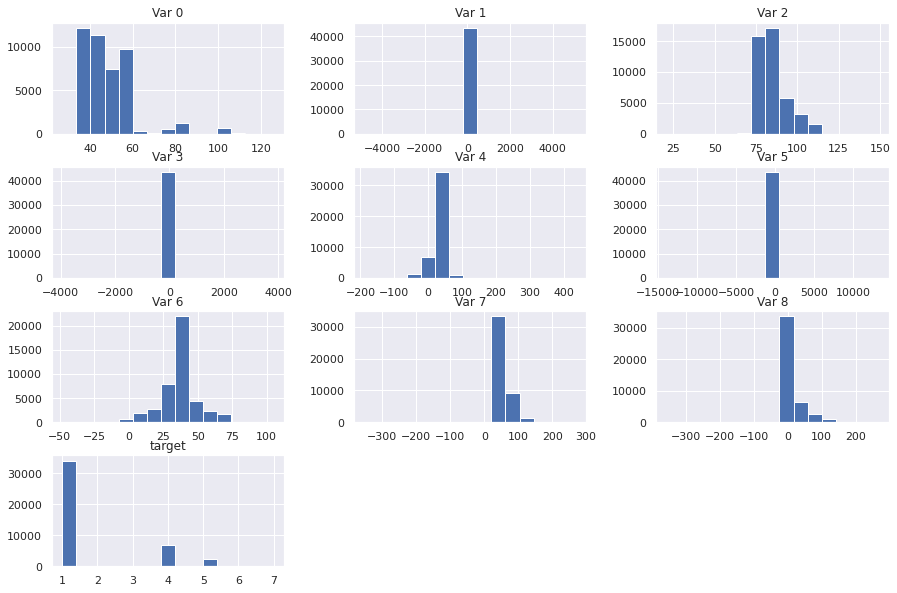

In [0]:
df_train.hist(bins=15);

**The variables Var 1, Var 3, Var 5 contain many outliers:**

* It will be necessary to remove these points in order to perform the analysis correctly. 



### Analyzing Time vs target

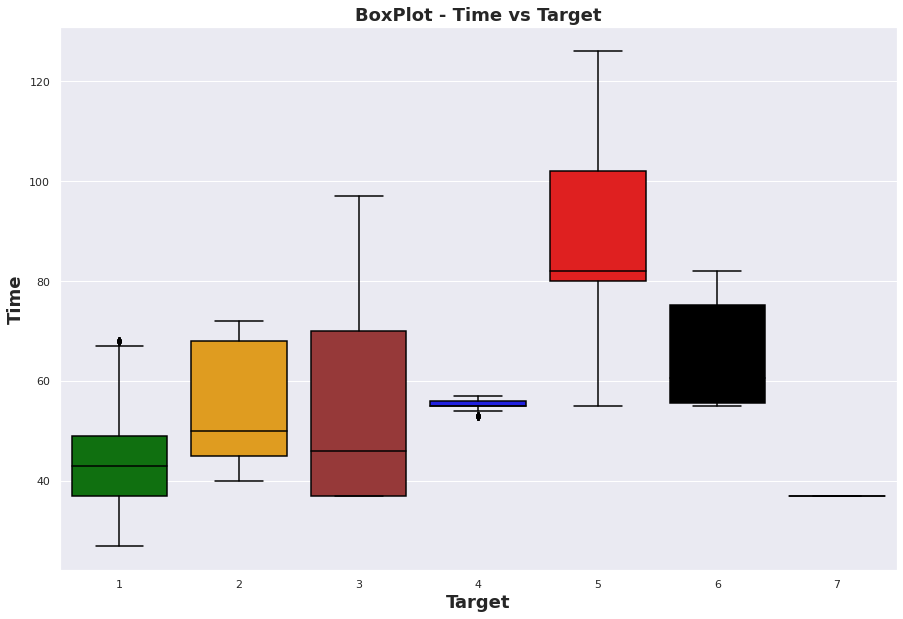

In [0]:
bp = sns.boxplot(x=df_train["target"], y=df_train["Var 0"], palette=palette);
bp.set_title('BoxPlot - Time vs Target', fontdict=fontdict)
bp.set_xlabel("Target", fontdict=fontdict)
bp.set_ylabel("Time", fontdict=fontdict);

**The 'Var 0' attribute is reported in the UCI as being the time.**
This attribute very useful for the classification task, as detailed below:
  * The majoritarian class (Class 1, color Green) occurs up to approximately value 70 in time.
  * Class 4 (Blue) occurs in a very specific period
  * Class 5 (Red) has a more comprehensive distribution. However, comparing with class 1 (Green), there seems to be a transition from the periods that occur to class 1 and 5.

# Relationship of time with other variables

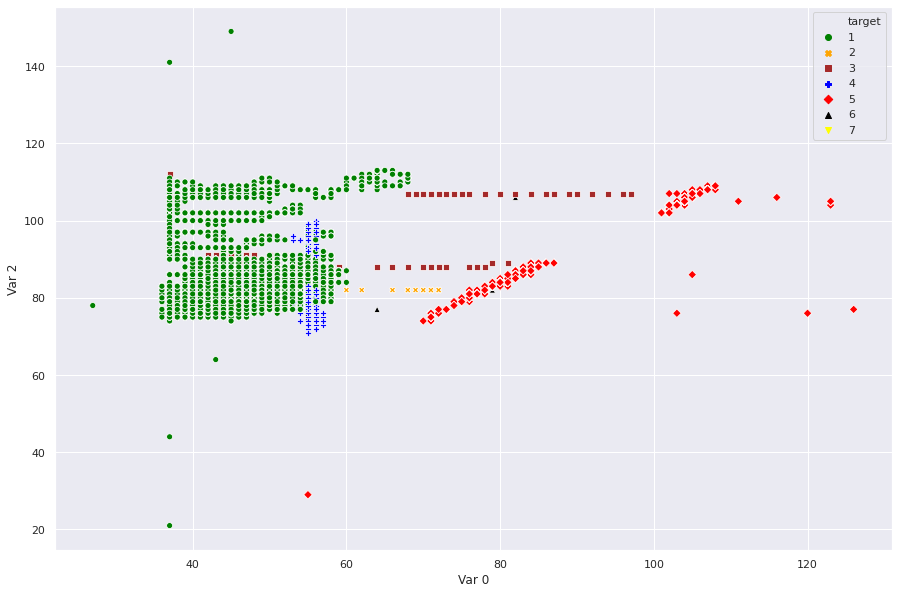

In [0]:
sns.scatterplot(x='Var 0', y='Var 2', hue='target', data=df_train, style='target', 
                    palette=palette, legend='full');

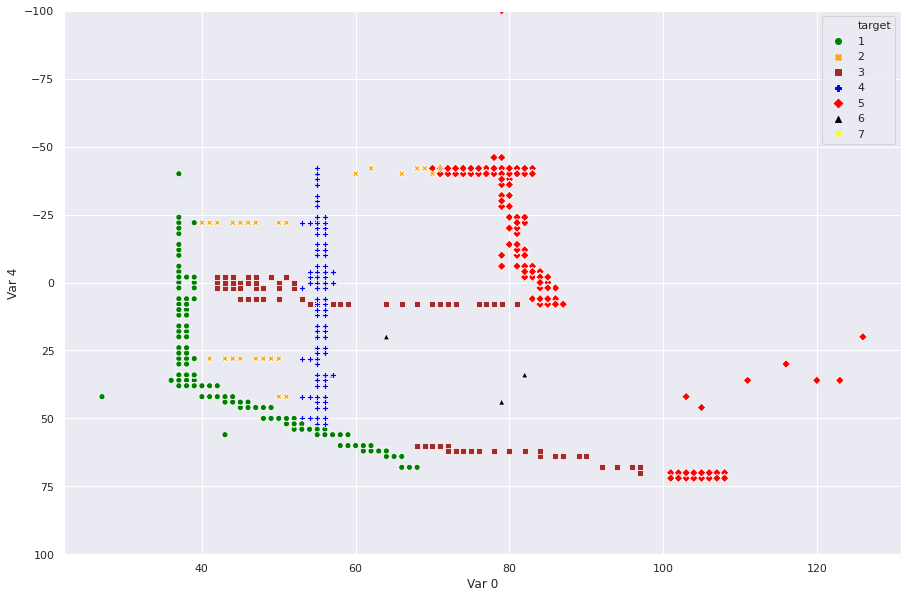

In [0]:
sns.scatterplot(x='Var 0', y='Var 4', hue='target', data=df_train, style='target', 
                    palette=palette, legend='full');
plt.ylim((100, -100));

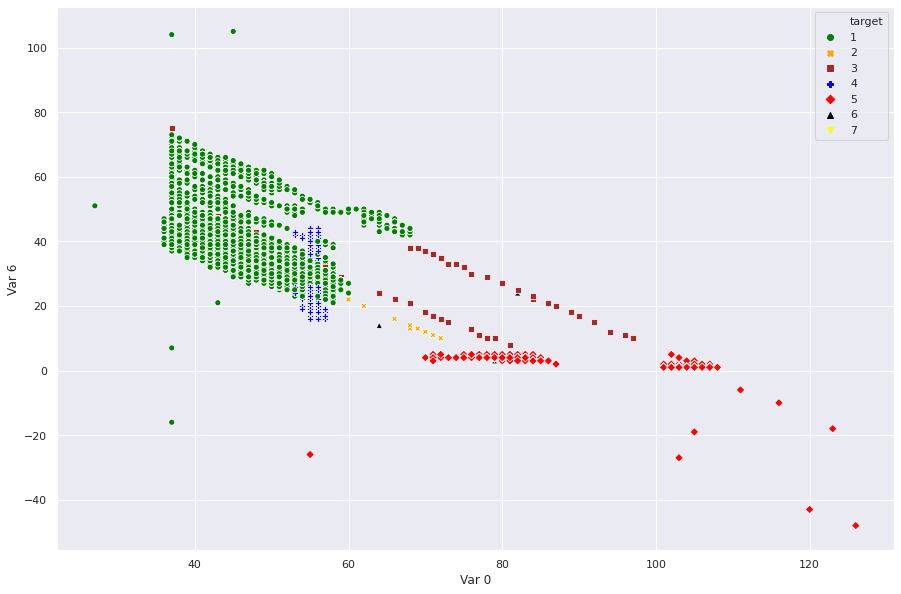

In [0]:
sns.scatterplot(x='Var 0', y='Var 6', hue='target', data=df_train, style='target', 
                    palette=['green','orange','brown','blue', 'red', 'black', 'yellow'], legend='full');

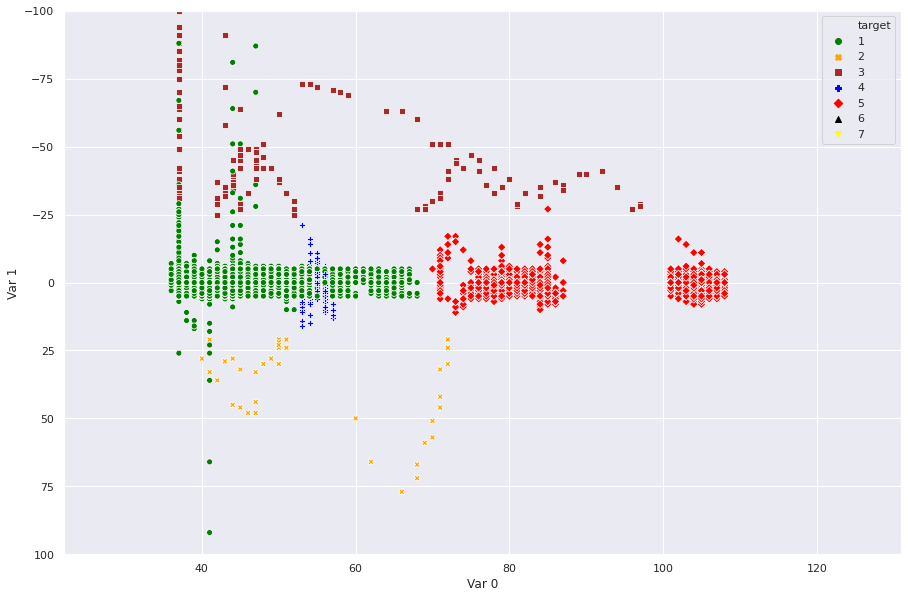

In [0]:
g = sns.scatterplot(x='Var 0', y='Var 1', hue='target', data=df_train, style='target', 
                    palette=['green','orange','brown','blue', 'red', 'black', 'yellow'], legend='full');
plt.ylim((100, -100));

### Correlation Matrix

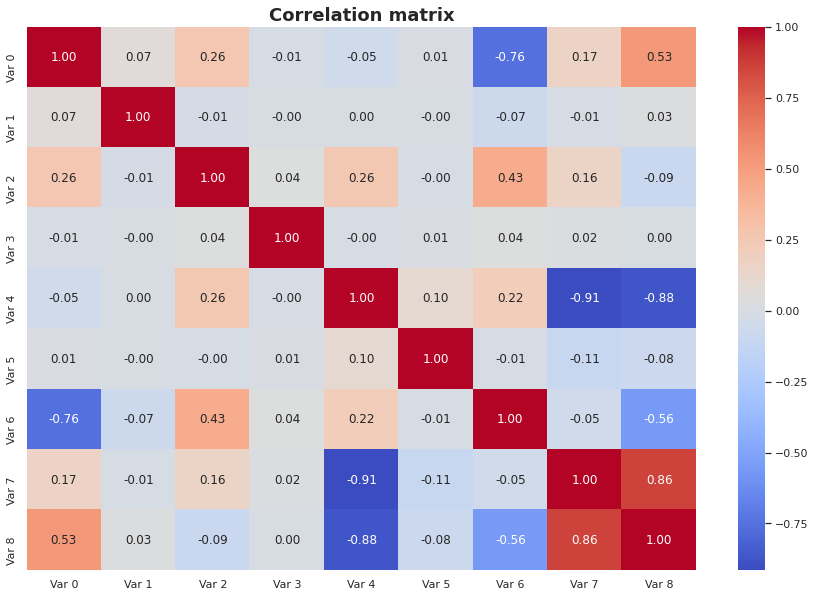

In [0]:
corr = df_train.iloc[:, :-1].corr()
g = sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
g.set_title("Correlation matrix", fontdict=fontdict);